In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


In [2]:
car_data = pd.read_csv("C:/Users/MIR FAISAL/Downloads/car data.csv")
print(car_data.head())
print(car_data.shape)


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
(301, 9)


In [5]:
car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)
car_data.replace({'Seller_Type':{'Dealer': 0, 'Individual': 1}}, inplace=True)

print(car_data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  


In [6]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_data['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [7]:
#Training the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Data_prediction = lin_reg.predict(X_train)

In [8]:
R_error = metrics.r2_score(Y_train, Data_prediction)
print("R squared error: ", R_error*100,"%")

R squared error:  87.99451660493716 %


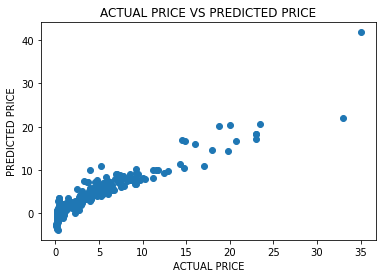

In [9]:
#visualizing the actual price vs predicted price
plt.scatter(Y_train,Data_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.title('ACTUAL PRICE VS PREDICTED PRICE')
plt.show()

In [10]:
test_data_prediction = lin_reg.predict(X_test)
R_error = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", R_error*100,"%")

R squared error:  83.65766715027156 %


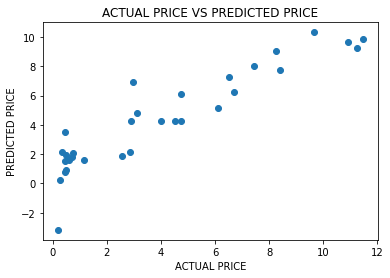

In [11]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.title('ACTUAL PRICE VS PREDICTED PRICE')
plt.show()

In [12]:
#Using Lasso Regression
lass_reg = Lasso()
lass_reg.fit(X_train,Y_train)
lasso_reg_prediction = lass_reg.predict(X_train)

In [13]:
#Calculating Error for lasso
R_error = metrics.r2_score(Y_train, lasso_reg_prediction)
print("R squared error for lasso (training data): ", R_error*100,"%")

R squared error for lasso (training data):  84.27856123435794 %


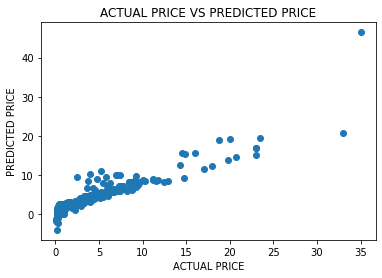

In [14]:
#Visualizing the training data for lasso regression
plt.scatter(Y_train,lasso_reg_prediction)
plt.xlabel('ACTUAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.title('ACTUAL PRICE VS PREDICTED PRICE')
plt.show()
